# Introduction


**What?** Check for stationarity - unit root test of Dickey and Fuller



# Why do we care about stationary series?


- The observations in a stationary time series are not dependent on time. 
- Time series are stationary if they do not have trend or seasonal effects.
- Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations. 
- When a time series is stationary, it can be easier to model. 
- Statistical modeling methods assume or require the time series to be stationary to be effective.



# Import modules

In [3]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import log
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

rcParams['figure.figsize'] = 17, 8
rcParams['font.size'] = 20

# Stationary time series

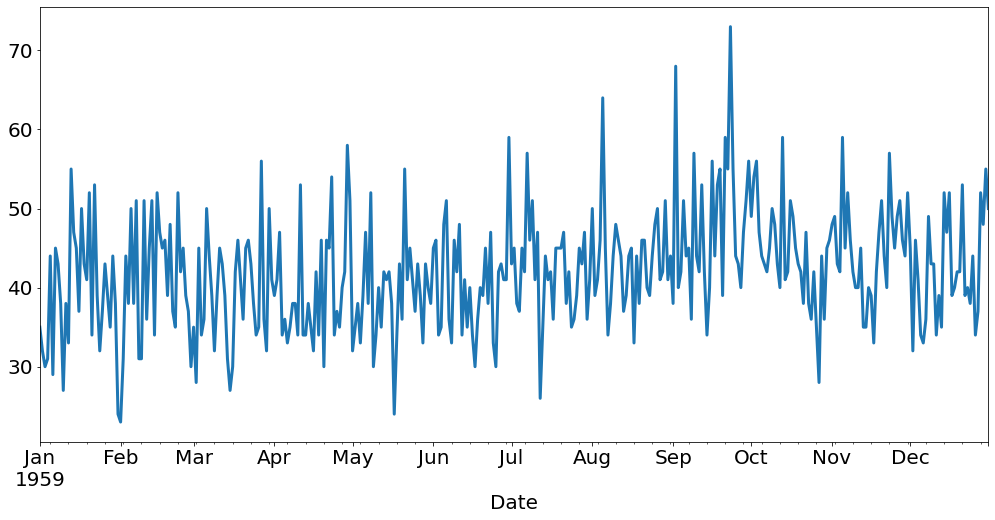

In [5]:
series = read_csv('../DATASETS/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
    squeeze=True)
series.plot(lw = 3)
pyplot.show()

# Non-Stationary Time Series


- Below is an example of the Airline Passengers dataset that is non-stationary.
- The time series shows both trend and seasonal components. 



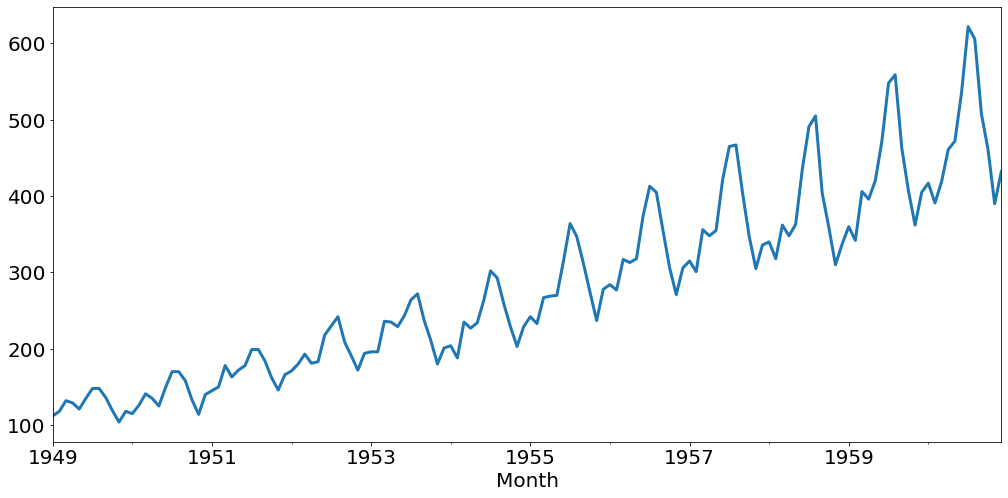

In [6]:
series = read_csv('../DATASETS/airline-passengers.csv', header=0, index_col=0, parse_dates=True,
    squeeze=True)
series.plot(lw = 3)
pyplot.show()

# Daily Births Dataset


- A simple histogram plot will help us establish if the series is stationay.
- We clearly see the bell curve-like shape of the Gaussian distribution, perhaps with a longer right tail, thus the series is stationary.



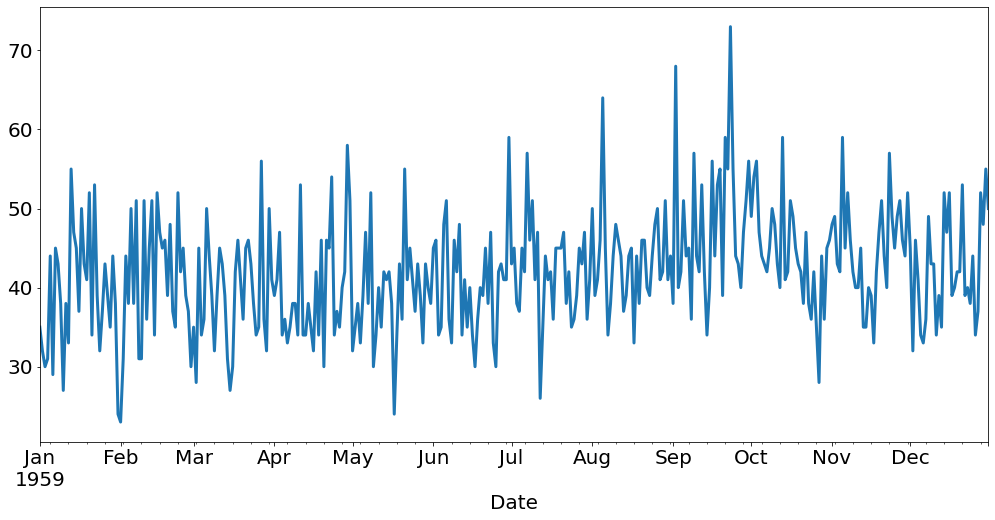

In [7]:
series = read_csv('../DATASETS/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
    squeeze=True)
series.plot(lw = 3)
pyplot.show()

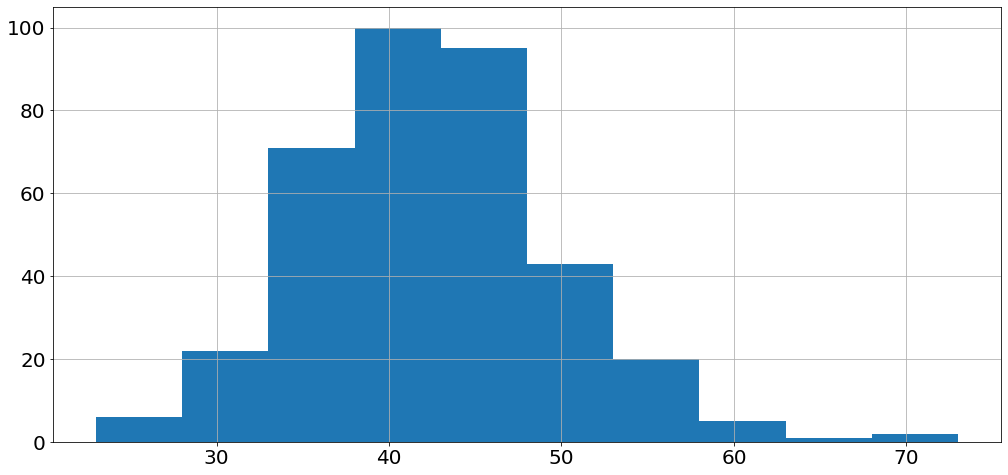

In [8]:
series.hist()
pyplot.show()


- Next, we can split the time series into two contiguous sequences. 
- We can then calculate the mean and variance of each group of numbers and compare the values. 
- Running this example shows that the mean and variance values are different, but in the same ball-park.



In [7]:
series = read_csv('../DATASETS/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2)) 
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


# Airline Passengers Dataset


- Running the example, we can see the mean and variance look VERY different. 
- We have a NON-stationary time series.
- Running the example shows that indeed the distribution of values does NOT look like a Gaussian, THEREFORE the mean and variance values are LESS meaningful. 
- This squashed distribution of the observations may be another indicator of a non-stationary time series.



In [9]:
series = read_csv('../DATASETS/airline-passengers.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2)) 
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


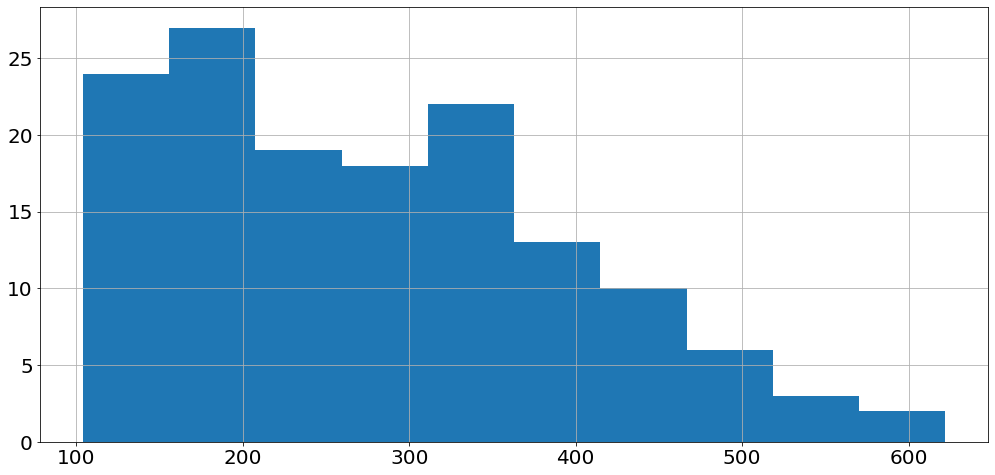

In [10]:
series = read_csv('../DATASETS/airline-passengers.csv', header=0, index_col=0, parse_dates=True,
    squeeze=True)
series.hist()
pyplot.show()


- Reviewing the plot of the time series again, we can see that there is an obvious seasonality component, and it looks like the seasonality component is growing. 
- This may suggest an exponential growth from season to season. 
- A log transform can be used to flatten out exponential change back to a linear relationship.



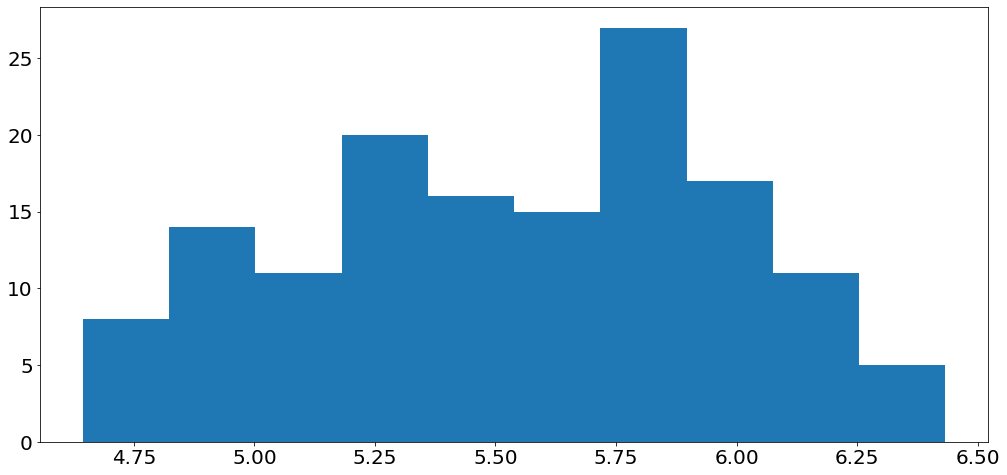

In [11]:
series = read_csv('../DATASETS/airline-passengers.csv', header=0, index_col=0, parse_dates=True,
    squeeze=True)
X = series.values
X = log(X)
pyplot.hist(X)
pyplot.show()


- Running the example, we can see the more familiar Gaussian-like or Uniform-like distribution of values.
- We also create a line plot of the log transformed data and can see the exponential growth seems diminished (compared to the line plot of the dataset in the Appendix), but we still have a trend and seasonal elements.



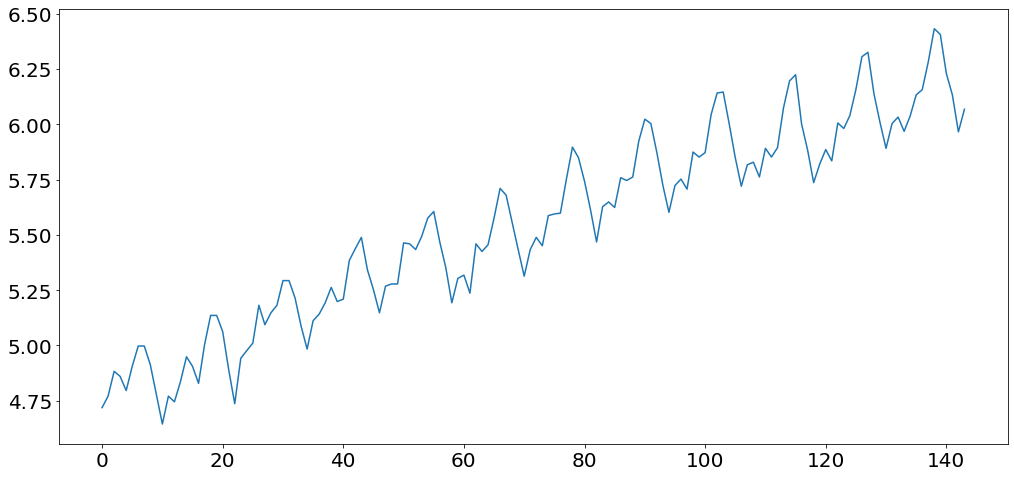

In [12]:
pyplot.plot(X)
pyplot.show()


- We can now calculate the mean and standard deviation of the values of the log transformed dataset.
- In fact now the distribution has a proper normal distribution and mean and standard deviation are more meaningful.
- Running the examples shows mean and standard deviation values for each group that are again similar, but not identical.  
- Perhaps, from these numbers alone, we would say the time series is stationary but it **NOT**.
- This is a quick and dirty method that may be easily FOOLED, so it must be used with caution.



In [14]:
series = read_csv('../DATASETS/airline-passengers.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
X = series.values
X = log(X)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2)) 
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


# Augmented Dickey-Fuller test


- This is a statistical test designed to explicitly comment on whether a univariate time series is **stationary**.

- Statistical tests make strong assumptions about your data. They can only be used to inform the degree to 
which a null hypothesis can be rejected (or fail to be rejected). The result must be interpreted for a given
problem to be meaningful. **So, why are we still using it?** Nevertheless, they can provide a quick check and confirmatory evidence that your
time series is stationary or non-stationary.



In [15]:
series = read_csv('../DATASETS/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571



- Running the example prints the test statistic value of -4. The more negative this statistic, the more likely
we are to reject the null hypothesis (we have a stationary dataset). As part of the output, we get a look-up 
table to help determine the ADF statistic. We can see that our statistic value of -4 is less than the value
of -3.449 at 1%.

- This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low 
probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process 
has no unit root, and in turn that the time series is stationary or does not have
time-dependent structure.



In [17]:
series = read_csv('../DATASETS/airline-passengers.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579



- Running the example gives a different picture than the above. The test statistic is positive, meaning we 
are much less likely to reject the null hypothesis (it looks non-stationary). Comparing the test statistic
to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series
is NON-stationary and does have time-dependent structure.

- Let’s log transform the dataset again to make the distribution of values more linear and better meet the 
expectations of this statistical test.



In [18]:
series = read_csv('../DATASETS/airline-passengers.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
X = series.values
X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
	1%: -3.482
	5%: -2.884
	10%: -2.579



- Running the example shows a negative value for the test statistic. 
- We can see that the value is larger than the critical values, again, meaning that we fail to reject the null hypothesis and in turn that the time series is NON-stationary.
- This time the log transform did not fool us!



# Conclusions


- There are quick and dirty ways of checking if a time series is stationary or not, but they all have limitations.
- If you really want to be sure, the use the unit root test of **Dickey and Fuller**.



# References


- https://machinelearningmastery.com/?s=time+series&post_type=post&submit=Search
    
